# TP3 - Regressão Linear

In [ ]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline

# 1

Mede-se a altura de um foguete em $\Delta t$ s fixos como pares de dados $(s,t)$ com unidades (s,m). Vamos supor o seguinte modelo:

$$ s = a+bt+ct^2 $$

O modelo geral para aplicação de uma regressão linear é dado por:

$$ y=\omega_0+\omega_1 x^{(1)} +...+ \omega_D x^{(D)} $$

que é equivalente a termos um $x^{(0)}=1$.

Neste casos específico, a,b e c representam os pesos (que são as incógnitas do problema) e $x^{(1)}$ e $x^{(2)}$ são $t$ e $t^2$, respetivamente. Os pesos variam linearmente com as features, $x$ , daí estarmos numa situação de regressão linear. Assim:

$$ Y=\left[\begin{array}{c}s_0 \\ s_1 \\ \vdots \\ s_D \end{array}\right] , \qquad X=\left[\begin{array}{ccc} 1&t_0&t_0^2 \\ 1&t_1&t_1^2 \\ \vdots&\vdots&\vdots \\ 1&t_D&t_D^2 \end{array}\right]$$

## a)

A incógnita é $\omega$. $y=s$ e $x=t$.

$$ L(\omega)=(Y-X^T \omega)^T (Y-X^T \omega)=Y^T Y -Y^TX^T\omega -\omega^TXY+\omega^T XX^T\omega \\ \omega^* = (X^TX)^{-1}X^T Y $$

Sendo que este resultado é obtido igualando a derivada da função Loss a 0, ou seja, faz-se o processo de encontrar um mínimo desta função $\to$ numa regressão linear pretende-se, pois, minimizar as perdas.

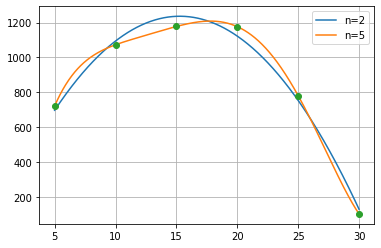

In [ ]:
t = np.array([5,10,15,20,25,30])
s = np.array([722,1073,1178,1177,781,102])

def poly_regression(x,y,n,dados_teste):
    '''
    x : dados da variável independente
    y : dados da variável dependente
    n : número de pesos do modelo
    '''
    # criar matriz X
    X = np.zeros((len(y),n+1)) # o '+1' é incluindo devido à coluna de x_0 -> nº colunas=nºfeatures(n)+1
    X[:,0] = np.ones(len(y))
    for i in range(1,n+1):
        X[:,i] = x**i

    # criar matriz Y -> é os dados de y mas em forma de coluna
    Y = y.reshape((len(y),1))

    # matriz que é o inverso do produto de X pela sua transposta
    X_new = np.linalg.inv(np.dot(np.transpose(X),X))

    # matriz que é o produto da transposta de X por Y
    w_almost = np.dot(np.transpose(X),Y)

    # matriz com os pesos
    w = np.dot(X_new,w_almost)

    #dados previstos para entradas de teste
    X_teste = np.zeros((len(dados_teste),n+1))
    X_teste[:,0] = np.ones(len(dados_teste))
    for i in range(1,n+1):
        X_teste[:,i] = dados_teste**i

    previsao = np.dot(X_teste,w)

    return previsao,w

time = np.linspace(np.min(t),np.max(t),1000)
dados,parametros = poly_regression(t,s,2,time)
dados1,parametros1 = poly_regression(t,s,5,time)
plt.plot(time,dados,label='n=2')
plt.plot(time,dados1,label='n=5')
plt.plot(t,s,'o')
plt.legend()
plt.grid();

## b)

Calcular os valores de $a$,$b$ e $c$ usando a regressão linear de ridge, com $\lambda=0.5$ (regularizador que tem como objetivo diminuir a variância).

Para o caso da regressão de ridge, a solução para os pesos é dada por:

$$ \omega^* = (X^T X+\lambda I)^{-1}X^TY $$

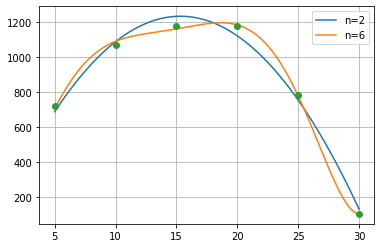

In [ ]:
def Ridge_Regression(x,y,n,l,dados_teste):
    X = np.zeros((len(y),n+1)) # o '+1' é incluindo devido à coluna de x_0 -> nº colunas=nºfeatures(n)+1
    X[:,0] = np.ones(len(y))
    for i in range(1,n+1):
        X[:,i] = x**i

    Y = y.reshape((len(y),1))
    I = np.identity(n+1)
    w = np.linalg.inv(np.dot(np.transpose(X),X)+l*I)
    w = np.dot(w,np.dot(np.transpose(X),Y))

    X_teste = np.zeros((len(dados_teste),n+1))
    X_teste[:,0] = np.ones(len(dados_teste))
    for i in range(1,n+1):
        X_teste[:,i] = dados_teste**i

    previsao = np.dot(X_teste,w)

    return previsao,w
d_new,par_new = Ridge_Regression(t,s,2,0.5,time)
d_new1,par_new1 = Ridge_Regression(t,s,6,0.5,time)

plt.plot(time,d_new,label='n=2')
plt.plot(time,d_new1,label='n=6')
# plt.plot(time,dados)
plt.plot(t,s,'o')
plt.legend()
plt.grid();


## c)

$$ MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i-\hat{y}_i)^2 $$

onde $y_i$ corresponde a um valor observado e $\hat{y}_i$ a um valor previsto pelo modelo.

In [ ]:
yc = s.copy()
xc = t.copy()

def MSE(y_obs,y_prev):
    return (1/len(y_obs))*np.sum(y_obs-y_prev)**2

data_c,par_c = poly_regression(xc,yc,2,xc)
print(MSE(yc,data_c))

data2_c,par2_c = Ridge_Regression(xc,yc,2,0.5,xc)
print(MSE(yc,data2_c))


5.907310344547447e-21
1245.6230069956566


## d)